In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
#Create the dataset based on the given table
x = np.array([[280, 3, 7, 8.9],
              [140, 2, 5, 2.3],
              [225, 2, 6, 7.0],
              [300, 4, 4, 9.2],
              [180, 2, 3, 3.4],
              [195, 2, 5, 5.6],
              [305, 4, 2, 9.4],
              [150, 3, 8, 3.8]])
print(x)

[[280.    3.    7.    8.9]
 [140.    2.    5.    2.3]
 [225.    2.    6.    7. ]
 [300.    4.    4.    9.2]
 [180.    2.    3.    3.4]
 [195.    2.    5.    5.6]
 [305.    4.    2.    9.4]
 [150.    3.    8.    3.8]]


In [ ]:
#Extract Floor Area (X) and House Price (y)
X = x[:,0].reshape(-1,1)
y = x[:,-1].reshape(-1,1)
print(X)
print(y)

[[280.]
 [140.]
 [225.]
 [300.]
 [180.]
 [195.]
 [305.]
 [150.]]
[[8.9]
 [2.3]
 [7. ]
 [9.2]
 [3.4]
 [5.6]
 [9.4]
 [3.8]]


In [ ]:
#Normalize Data
scalerX = StandardScaler()
X2 = scalerX.fit_transform(X)
scalerY = StandardScaler()
y2 = scalerY.fit_transform(y)
print(X2)
print(y2)

[[ 0.93757813]
 [-1.32067457]
 [ 0.05040743]
 [ 1.26018566]
 [-0.67545951]
 [-0.43350387]
 [ 1.34083754]
 [-1.15937081]]
[[ 1.01742015]
 [-1.46960689]
 [ 0.30145782]
 [ 1.13046684]
 [-1.05510238]
 [-0.22609337]
 [ 1.20583129]
 [-0.90437347]]


In [ ]:
#Fit Linear Regression
model = LinearRegression().fit(X2, y2)
print("Coefficients: \n", model.intercept_, model.coef_)
r_sq = model.score(X2, y2)
print(f"R^2: {r_sq}")

#Generate prediction based on inputs
ypred = model.predict(X2)
MSE = ((y - ypred)**2).sum()
print(f"MSE: {MSE}")

Coefficients: 
 [3.04654206e-16] [[0.97632456]]
R^2: 0.9532096501635148
MSE: 331.01207667242306


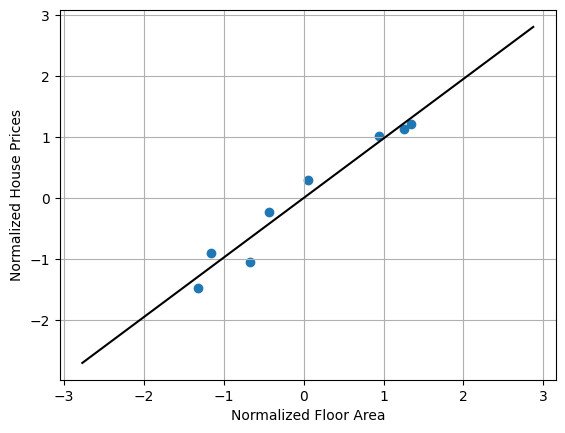

In [ ]:
# Define a range for the line, extending beyond the original data range
X_line = np.linspace(50, 400, 100).reshape(-1, 1)

# Normalize the extended range using the previously fitted scalerX
X_line_normalized = scalerX.transform(X_line)

# Predict using the linear model in the normalized space
y_line_normalized = model.predict(X_line_normalized)
plt.scatter(X2,y2)

# Predict using the linear model in the normalized space
y_line_normalized = model.predict(X_line_normalized)

plt.plot(X_line_normalized, y_line_normalized,color='k')
plt.xlabel('Normalized Floor Area')
plt.ylabel('Normalized House Prices')
plt.grid()
plt.show()

In [ ]:
# Get the coefficients and intercept of the scaled model
scaled_intercept = model.intercept_
scaled_coefficients = model.coef_

# Calculate original coefficients
original_coefficients = scaled_coefficients * (scalerY.scale_ / scalerX.scale_)

# Calculate the original intercept
original_intercept = scalerY.mean_ - np.dot(original_coefficients, scalerX.mean_) + scaled_intercept * scalerY.scale_

print("Original Intercept: ", original_intercept)
print("Original Coefficients: ", original_coefficients)

Original Intercept:  [-3.07279195]
Original Coefficients:  [[0.04179287]]


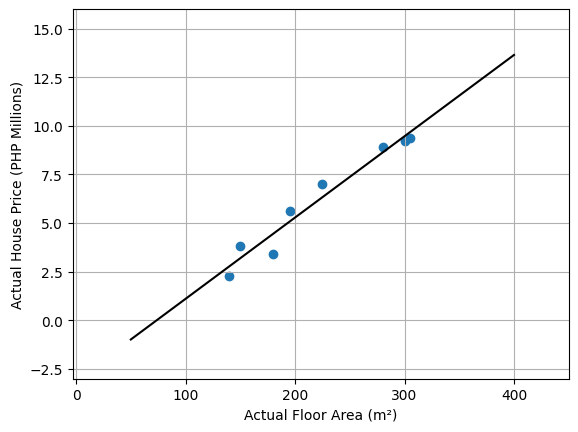

In [ ]:
# Define a range for the line, extending beyond the original data range
X_line = np.linspace(50, 400, 100).reshape(-1, 1)  # Create 100 points from 0 to 450 for plotting

# Normalize the extended range using the previously fitted scalerX
X_line_normalized = scalerX.transform(X_line)

# Predict using the linear model in the normalized space
y_line_normalized = model.predict(X_line_normalized)

# Transform the predicted values back to the original space
y_line_original = scalerY.inverse_transform(y_line_normalized)

# Plot original data and fitted line
plt.scatter(X_original, y_original)
plt.plot(X_line, y_line_original, color = 'k')
plt.xlabel("Actual Floor Area (m²)")
plt.ylabel("Actual House Price (PHP Millions)")
plt.ylim(-3, 16)
plt.xlim(-3, 450)
plt.grid()
plt.show()
